# Emoticon Dataset

## Importing Emoticon Dataset

In [88]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon']
train_emoticon_Y = train_emoticon_df['label'].to_numpy()

valid_emoticon_df=pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon']
valid_emoticon_Y = valid_emoticon_df['label'].to_numpy()

## Taking % of training data set

In [90]:
train_emoticon_X_100 = train_emoticon_X
train_emoticon_Y_100 = train_emoticon_Y
train_emoticon_X_80, train_emoticon_X_20, train_emoticon_Y_80, train_emoticon_Y_20 = train_test_split(train_emoticon_X, train_emoticon_Y, test_size=0.2, stratify=train_emoticon_Y, random_state=42)
train_emoticon_X_60, train_emoticon_X_40, train_emoticon_Y_60, train_emoticon_Y_40 = train_test_split(train_emoticon_X, train_emoticon_Y, test_size=0.4, stratify=train_emoticon_Y, random_state=42)

## For 100% Training Data

### Feature Transformation and encoding

#### Transformation

In [91]:
train_emoticon_X_data_100 = [list(input_str) for input_str in train_emoticon_X_100]
train_emoticon_X_data_100 = pd.DataFrame(train_emoticon_X_data_100)
train_emoticon_X_data_100 = train_emoticon_X_data_100.map(ord)
train_emoticon_X_data_100 = train_emoticon_X_data_100.astype(str)
train_emoticon_X_data_100 = train_emoticon_X_data_100.apply(lambda row: ' '.join(row.values), axis=1)
train_emoticon_X_data_100 = pd.DataFrame(train_emoticon_X_data_100, columns=['text'])

In [92]:
valid_emoticon_X_data_100 = [list(input_str) for input_str in valid_emoticon_X]
valid_emoticon_X_data_100 = pd.DataFrame(valid_emoticon_X_data_100)
valid_emoticon_X_data_100 = valid_emoticon_X_data_100.map(ord)
valid_emoticon_X_data_100 = valid_emoticon_X_data_100.astype(str)
valid_emoticon_X_data_100 = valid_emoticon_X_data_100.apply(lambda row: ' '.join(row.values), axis=1)
valid_emoticon_X_data_100 = pd.DataFrame(valid_emoticon_X_data_100, columns=['text'])

#### Embedding

In [93]:
train_df = train_emoticon_X_data_100
valid_df = valid_emoticon_X_data_100

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
print(combined_vocab)
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
print(combined_vocab)
vocab_dict_100 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_100):
    return df['tokens'].apply(lambda x: [vocab_dict_100[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_100)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_100)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_100) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_100 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model')
model_1_100.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_100.summary()

train_labels = train_emoticon_Y_100
model_1_100.fit(train_padded, train_labels, epochs=6, batch_size=2)

embedding_model_100 = Model(inputs=model_1_100.input, outputs=model_1_100.get_layer("embedding_layer").output)

train_embeddings_100 = embedding_model_100.predict(train_padded)
valid_embeddings_100 = embedding_model_100.predict(valid_padded)

{'128644', '128594', '128545', '128589', '128591', '128556', '128607', '128530', '128735', '128547', '128541', '128622', '128576', '128562', '128521', '128691', '128733', '128669', '128553', '128677', '128558', '128645', '128548', '128631', '128564', '128526', '128643', '128680', '128549', '128651', '128617', '128580', '128673', '128544', '128732', '128536', '128560', '128711', '128725', '128554', '128710', '128602', '128600', '128542', '128515', '128585', '128599', '128664', '128566', '128590', '128573', '128637', '128687', '128537', '128706', '128688', '128615', '128670', '128663', '128720', '128581', '128657', '128681', '128728', '128690', '128595', '128723', '128528', '128626', '128727', '128726', '128724', '128666', '128568', '128518', '128584', '128512', '128543', '128587', '128655', '128616', '128596', '128630', '128579', '128693', '128712', '128647', '128672', '128513', '128642', '128527', '128671', '128715', '128701', '128588', '128614', '128650', '128721', '128653', '128638',

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7308 - loss: 0.4634
Epoch 2/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9329 - loss: 0.1517
Epoch 3/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9478 - loss: 0.1236
Epoch 4/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9614 - loss: 0.0953
Epoch 5/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9608 - loss: 0.0901
Epoch 6/6
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9645 - loss: 0.0815
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [94]:
train_emotioc_X_flattened_100 = train_embeddings_100.reshape(train_embeddings_100.shape[0], -1)
valid_emotioc_X_flattened_100 = valid_embeddings_100.reshape(valid_embeddings_100.shape[0], -1)

train_emoticon_X_encoded_100=pd.DataFrame(train_emotioc_X_flattened_100)
valid_emoticon_X_encoded_100=pd.DataFrame(valid_emotioc_X_flattened_100)

#### Feature Standardization

In [95]:
scaler_100 = StandardScaler()
train_emoticon_X_encoded_100 = scaler_100.fit_transform(train_emoticon_X_encoded_100)
valid_emoticon_X_encoded_100 = scaler_100.transform(valid_emoticon_X_encoded_100)

### Model Training

In [96]:
model_100=SVC(C=0.1, degree=2, gamma='auto', kernel='rbf')

model_100.fit(train_emoticon_X_encoded_100, train_emoticon_Y_100)

y_pred_train_100 = model_100.predict(train_emoticon_X_encoded_100)
y_pred_valid_100 = model_100.predict(valid_emoticon_X_encoded_100)

### Accuracy Checking

Accuracy: 96.9325
Confusion Matrix:
[[244   8]
 [  7 230]]


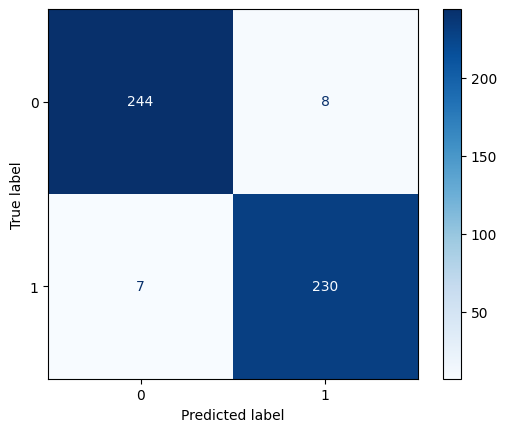

In [97]:
accuracy_100 = accuracy_score(valid_emoticon_Y, y_pred_valid_100)
conf_matrix = confusion_matrix(valid_emoticon_Y, y_pred_valid_100)

print(f"Accuracy: {accuracy_100*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 80% Training Data

### Feature Transformation and encoding

#### Transformation

In [98]:
train_emoticon_X_data_80 = [list(input_str) for input_str in train_emoticon_X_80]
train_emoticon_X_data_80 = pd.DataFrame(train_emoticon_X_data_80)
train_emoticon_X_data_80 = train_emoticon_X_data_80.map(ord)
train_emoticon_X_data_80 = train_emoticon_X_data_80.astype(str)
train_emoticon_X_data_80 = train_emoticon_X_data_80.apply(lambda row: ' '.join(row.values), axis=1)
train_emoticon_X_data_80 = pd.DataFrame(train_emoticon_X_data_80, columns=['text'])

In [99]:
valid_emoticon_X_data_80 = [list(input_str) for input_str in valid_emoticon_X]
valid_emoticon_X_data_80 = pd.DataFrame(valid_emoticon_X_data_80)
valid_emoticon_X_data_80 = valid_emoticon_X_data_80.map(ord)
valid_emoticon_X_data_80 = valid_emoticon_X_data_80.astype(str)
valid_emoticon_X_data_80 = valid_emoticon_X_data_80.apply(lambda row: ' '.join(row.values), axis=1)
valid_emoticon_X_data_80 = pd.DataFrame(valid_emoticon_X_data_80, columns=['text'])

#### Embedding

In [100]:
train_df = train_emoticon_X_data_80
valid_df = valid_emoticon_X_data_80

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
print(combined_vocab)
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
print(combined_vocab)
vocab_dict_80 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_80):
    return df['tokens'].apply(lambda x: [vocab_dict_80[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_80)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_80)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_80) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_80 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model')
model_1_80.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_80.summary()

train_labels = train_emoticon_Y_80
model_1_80.fit(train_padded, train_labels, epochs=6, batch_size=2)

embedding_model_80 = Model(inputs=model_1_80.input, outputs=model_1_80.get_layer("embedding_layer").output)

train_embeddings_80 = embedding_model_80.predict(train_padded)
valid_embeddings_80 = embedding_model_80.predict(valid_padded)

{'128644', '128594', '128545', '128589', '128591', '128556', '128607', '128530', '128735', '128547', '128541', '128622', '128576', '128562', '128521', '128691', '128733', '128669', '128553', '128677', '128558', '128645', '128548', '128631', '128564', '128526', '128643', '128680', '128549', '128651', '128617', '128580', '128673', '128544', '128732', '128536', '128560', '128711', '128725', '128554', '128710', '128602', '128600', '128542', '128515', '128585', '128599', '128664', '128590', '128566', '128573', '128637', '128687', '128537', '128706', '128688', '128615', '128670', '128581', '128720', '128657', '128681', '128663', '128728', '128690', '128595', '128723', '128727', '128626', '128528', '128726', '128724', '128666', '128568', '128518', '128584', '128512', '128543', '128587', '128655', '128616', '128596', '128630', '128579', '128647', '128693', '128712', '128658', '128672', '128513', '128642', '128527', '128671', '128701', '128715', '128588', '128614', '128650', '128721', '128653',

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6935 - loss: 0.5105
Epoch 2/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9309 - loss: 0.1639
Epoch 3/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9443 - loss: 0.1296
Epoch 4/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9552 - loss: 0.1076
Epoch 5/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9644 - loss: 0.0890
Epoch 6/6
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9649 - loss: 0.0819
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [101]:
train_emotioc_X_flattened_80 = train_embeddings_80.reshape(train_embeddings_80.shape[0], -1)
valid_emotioc_X_flattened_80 = valid_embeddings_80.reshape(valid_embeddings_80.shape[0], -1)

train_emoticon_X_encoded_80=pd.DataFrame(train_emotioc_X_flattened_80)
valid_emoticon_X_encoded_80=pd.DataFrame(valid_emotioc_X_flattened_80)

#### Feature Standardization

In [102]:
scaler_80 = StandardScaler()
train_emoticon_X_encoded_80 = scaler_80.fit_transform(train_emoticon_X_encoded_80)
valid_emoticon_X_encoded_80 = scaler_80.transform(valid_emoticon_X_encoded_80)

### Model Training

In [103]:
model_80=SVC(C=0.1, degree=2, gamma='auto', kernel='rbf')

model_80.fit(train_emoticon_X_encoded_80, train_emoticon_Y_80)

y_pred_train_80 = model_80.predict(train_emoticon_X_encoded_80)
y_pred_valid_80 = model_80.predict(valid_emoticon_X_encoded_80)

### Accuracy Checking

Accuracy: 96.5235
Confusion Matrix:
[[244   8]
 [  9 228]]


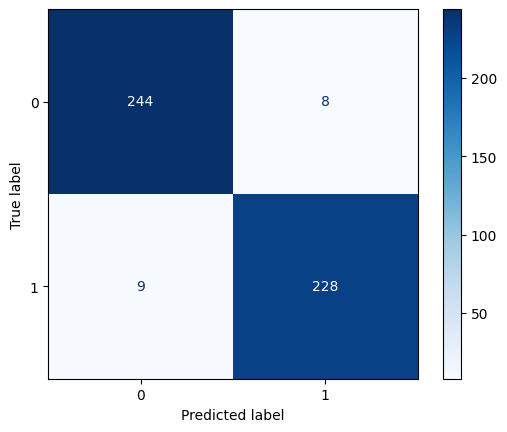

In [104]:
accuracy_80 = accuracy_score(valid_emoticon_Y, y_pred_valid_80)
conf_matrix = confusion_matrix(valid_emoticon_Y, y_pred_valid_80)

print(f"Accuracy: {accuracy_80*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 60% Training Data

### Feature Transformation and embedding

#### Transformation

In [105]:
train_emoticon_X_data_60 = [list(input_str) for input_str in train_emoticon_X_60]
train_emoticon_X_data_60 = pd.DataFrame(train_emoticon_X_data_60)
train_emoticon_X_data_60 = train_emoticon_X_data_60.map(ord)
train_emoticon_X_data_60 = train_emoticon_X_data_60.astype(str)
train_emoticon_X_data_60 = train_emoticon_X_data_60.apply(lambda row: ' '.join(row.values), axis=1)
train_emoticon_X_data_60 = pd.DataFrame(train_emoticon_X_data_60, columns=['text'])

In [106]:
valid_emoticon_X_data_60 = [list(input_str) for input_str in valid_emoticon_X]
valid_emoticon_X_data_60 = pd.DataFrame(valid_emoticon_X_data_60)
valid_emoticon_X_data_60 = valid_emoticon_X_data_60.map(ord)
valid_emoticon_X_data_60 = valid_emoticon_X_data_60.astype(str)
valid_emoticon_X_data_60 = valid_emoticon_X_data_60.apply(lambda row: ' '.join(row.values), axis=1)
valid_emoticon_X_data_60 = pd.DataFrame(valid_emoticon_X_data_60, columns=['text'])

#### Embedding

In [107]:
train_df = train_emoticon_X_data_60
valid_df = valid_emoticon_X_data_60

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
print(combined_vocab)
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
print(combined_vocab)
vocab_dict_60 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_60):
    return df['tokens'].apply(lambda x: [vocab_dict_60[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_60)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_60)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_60) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_60 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model')
model_1_60.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_60.summary()

train_labels = train_emoticon_Y_60
model_1_60.fit(train_padded, train_labels, epochs=6, batch_size=2)

embedding_model_60 = Model(inputs=model_1_60.input, outputs=model_1_60.get_layer("embedding_layer").output)

train_embeddings_60 = embedding_model_60.predict(train_padded)
valid_embeddings_60 = embedding_model_60.predict(valid_padded)

{'128594', '128644', '128545', '128589', '128591', '128556', '128607', '128530', '128735', '128547', '128541', '128622', '128576', '128562', '128521', '128691', '128733', '128669', '128553', '128677', '128558', '128645', '128548', '128631', '128564', '128643', '128680', '128651', '128549', '128617', '128580', '128673', '128544', '128732', '128536', '128560', '128711', '128725', '128554', '128710', '128602', '128600', '128515', '128542', '128585', '128599', '128664', '128566', '128590', '128573', '128637', '128687', '128537', '128706', '128688', '128615', '128670', '128581', '128720', '128657', '128663', '128681', '128728', '128690', '128595', '128723', '128727', '128626', '128528', '128726', '128724', '128666', '128568', '128518', '128584', '128512', '128543', '128587', '128655', '128616', '128596', '128630', '128579', '128647', '128693', '128712', '128672', '128513', '128642', '128527', '128671', '128701', '128715', '128588', '128614', '128569', '128638', '128721', '128653', '128650',

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6740 - loss: 0.5518
Epoch 2/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9282 - loss: 0.1829
Epoch 3/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9442 - loss: 0.1313
Epoch 4/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9613 - loss: 0.1067
Epoch 5/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.0932
Epoch 6/6
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.0833
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


In [108]:
train_emotioc_X_flattened_60 = train_embeddings_60.reshape(train_embeddings_60.shape[0], -1)
valid_emotioc_X_flattened_60 = valid_embeddings_60.reshape(valid_embeddings_60.shape[0], -1)

train_emoticon_X_encoded_60=pd.DataFrame(train_emotioc_X_flattened_60)
valid_emoticon_X_encoded_60=pd.DataFrame(valid_emotioc_X_flattened_60)

#### Feature Standardization

In [109]:
scaler_60 = StandardScaler()
train_emoticon_X_encoded_60 = scaler_60.fit_transform(train_emoticon_X_encoded_60)
valid_emoticon_X_encoded_60 = scaler_60.transform(valid_emoticon_X_encoded_60)

### Model Training

In [110]:
model_60=SVC(C=0.1, degree=2, gamma='auto', kernel='rbf')

model_60.fit(train_emoticon_X_encoded_60, train_emoticon_Y_60)

y_pred_train_60 = model_60.predict(train_emoticon_X_encoded_60)
y_pred_valid_60 = model_60.predict(valid_emoticon_X_encoded_60)

### Accuracy Checking

Accuracy: 95.7055
Confusion Matrix:
[[242  10]
 [ 11 226]]


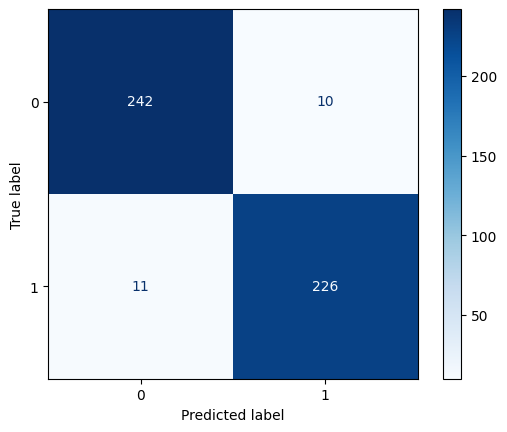

In [111]:
accuracy_60 = accuracy_score(valid_emoticon_Y, y_pred_valid_60)
conf_matrix = confusion_matrix(valid_emoticon_Y, y_pred_valid_60)

print(f"Accuracy: {accuracy_60*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 40% Training Data

### Feature Transformation and Encoding

#### Transformation

In [112]:
train_emoticon_X_data_40 = [list(input_str) for input_str in train_emoticon_X_40]
train_emoticon_X_data_40 = pd.DataFrame(train_emoticon_X_data_40)
train_emoticon_X_data_40 = train_emoticon_X_data_40.map(ord)
train_emoticon_X_data_40 = train_emoticon_X_data_40.astype(str)
train_emoticon_X_data_40 = train_emoticon_X_data_40.apply(lambda row: ' '.join(row.values), axis=1)
train_emoticon_X_data_40 = pd.DataFrame(train_emoticon_X_data_40, columns=['text'])

In [113]:
valid_emoticon_X_data_40 = [list(input_str) for input_str in valid_emoticon_X]
valid_emoticon_X_data_40 = pd.DataFrame(valid_emoticon_X_data_40)
valid_emoticon_X_data_40 = valid_emoticon_X_data_40.map(ord)
valid_emoticon_X_data_40 = valid_emoticon_X_data_40.astype(str)
valid_emoticon_X_data_40 = valid_emoticon_X_data_40.apply(lambda row: ' '.join(row.values), axis=1)
valid_emoticon_X_data_40 = pd.DataFrame(valid_emoticon_X_data_40, columns=['text'])

#### Embedding

In [114]:
train_df = train_emoticon_X_data_40
valid_df = valid_emoticon_X_data_40

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
print(combined_vocab)
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
print(combined_vocab)
vocab_dict_40 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_40):
    return df['tokens'].apply(lambda x: [vocab_dict_40[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_40)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_40)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_40) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_40 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model')
model_1_40.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_40.summary()

train_labels = train_emoticon_Y_40
model_1_40.fit(train_padded, train_labels, epochs=6, batch_size=2)

embedding_model_40 = Model(inputs=model_1_40.input, outputs=model_1_40.get_layer("embedding_layer").output)

train_embeddings_40 = embedding_model_40.predict(train_padded)
valid_embeddings_40 = embedding_model_40.predict(valid_padded)

{'128644', '128594', '128545', '128589', '128591', '128556', '128607', '128530', '128735', '128547', '128541', '128622', '128576', '128562', '128521', '128691', '128733', '128669', '128553', '128677', '128558', '128645', '128548', '128631', '128564', '128526', '128643', '128680', '128549', '128651', '128617', '128580', '128673', '128544', '128732', '128536', '128560', '128711', '128725', '128554', '128710', '128602', '128600', '128515', '128542', '128585', '128599', '128664', '128566', '128573', '128590', '128637', '128687', '128537', '128706', '128688', '128670', '128615', '128663', '128720', '128657', '128581', '128681', '128728', '128595', '128690', '128727', '128723', '128528', '128626', '128666', '128724', '128726', '128568', '128518', '128584', '128512', '128543', '128587', '128655', '128616', '128596', '128630', '128579', '128712', '128693', '128647', '128658', '128672', '128513', '128642', '128527', '128715', '128701', '128671', '128588', '128614', '128650', '128721', '128653',

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6225 - loss: 0.6227
Epoch 2/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9012 - loss: 0.2311
Epoch 3/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9330 - loss: 0.1585
Epoch 4/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9395 - loss: 0.1353
Epoch 5/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1130
Epoch 6/6
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9589 - loss: 0.1058
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [115]:
train_emotioc_X_flattened_40 = train_embeddings_40.reshape(train_embeddings_40.shape[0], -1)
valid_emotioc_X_flattened_40 = valid_embeddings_40.reshape(valid_embeddings_40.shape[0], -1)

train_emoticon_X_encoded_40=pd.DataFrame(train_emotioc_X_flattened_40)
valid_emoticon_X_encoded_40=pd.DataFrame(valid_emotioc_X_flattened_40)

#### Feature Standardization

In [116]:
scaler_40 = StandardScaler()
train_emoticon_X_encoded_40 = scaler_40.fit_transform(train_emoticon_X_encoded_40)
valid_emoticon_X_encoded_40 = scaler_40.transform(valid_emoticon_X_encoded_40)

### Model Training

In [117]:
model_40=SVC(C=0.1, degree=2, gamma='auto', kernel='rbf')

model_40.fit(train_emoticon_X_encoded_40, train_emoticon_Y_40)

y_pred_train_40 = model_40.predict(train_emoticon_X_encoded_40)
y_pred_valid_40 = model_40.predict(valid_emoticon_X_encoded_40)

### Accuracy Checking

Accuracy: 94.0695
Confusion Matrix:
[[240  12]
 [ 17 220]]


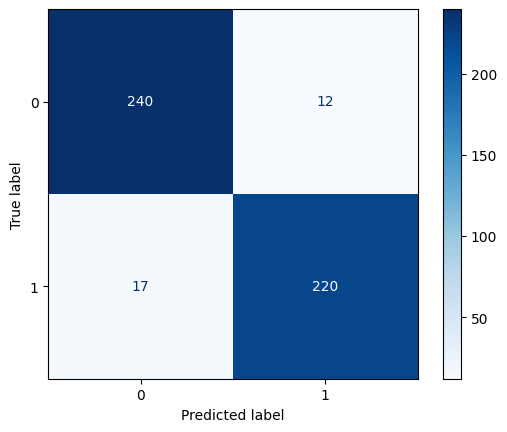

In [118]:
accuracy_40 = accuracy_score(valid_emoticon_Y, y_pred_valid_40)
conf_matrix = confusion_matrix(valid_emoticon_Y, y_pred_valid_40)

print(f"Accuracy: {accuracy_40*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 20% Training Data

### Feature Transformation and Encoding

#### Transformation

In [119]:
train_emoticon_X_data_20 = [list(input_str) for input_str in train_emoticon_X_20]
train_emoticon_X_data_20 = pd.DataFrame(train_emoticon_X_data_20)
train_emoticon_X_data_20 = train_emoticon_X_data_20.map(ord)
train_emoticon_X_data_20 = train_emoticon_X_data_20.astype(str)
train_emoticon_X_data_20 = train_emoticon_X_data_20.apply(lambda row: ' '.join(row.values), axis=1)
train_emoticon_X_data_20 = pd.DataFrame(train_emoticon_X_data_20, columns=['text'])

In [120]:
valid_emoticon_X_data_20 = [list(input_str) for input_str in valid_emoticon_X]
valid_emoticon_X_data_20 = pd.DataFrame(valid_emoticon_X_data_20)
valid_emoticon_X_data_20 = valid_emoticon_X_data_20.map(ord)
valid_emoticon_X_data_20 = valid_emoticon_X_data_20.astype(str)
valid_emoticon_X_data_20 = valid_emoticon_X_data_20.apply(lambda row: ' '.join(row.values), axis=1)
valid_emoticon_X_data_20 = pd.DataFrame(valid_emoticon_X_data_20, columns=['text'])

#### Embedding

In [121]:
train_df = train_emoticon_X_data_20
valid_df = valid_emoticon_X_data_20

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
print(combined_vocab)
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
print(combined_vocab)
vocab_dict_20 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_20):
    return df['tokens'].apply(lambda x: [vocab_dict_20[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_20)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_20)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_20) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_20 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model')
model_1_20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_20.summary()

train_labels = train_emoticon_Y_20
model_1_20.fit(train_padded, train_labels, epochs=6, batch_size=2)

embedding_model_20 = Model(inputs=model_1_20.input, outputs=model_1_20.get_layer("embedding_layer").output)

train_embeddings_20 = embedding_model_20.predict(train_padded)
valid_embeddings_20 = embedding_model_20.predict(valid_padded)

{'128644', '128594', '128545', '128589', '128591', '128556', '128607', '128530', '128735', '128547', '128541', '128622', '128576', '128562', '128521', '128691', '128733', '128669', '128553', '128677', '128558', '128645', '128548', '128631', '128564', '128643', '128680', '128651', '128549', '128617', '128580', '128673', '128544', '128732', '128536', '128560', '128711', '128725', '128554', '128710', '128602', '128600', '128542', '128515', '128585', '128599', '128664', '128590', '128573', '128566', '128637', '128687', '128537', '128706', '128688', '128670', '128615', '128581', '128720', '128657', '128663', '128681', '128728', '128595', '128690', '128723', '128727', '128626', '128528', '128666', '128726', '128724', '128568', '128512', '128518', '128584', '128543', '128587', '128655', '128616', '128596', '128630', '128579', '128647', '128693', '128712', '128658', '128672', '128513', '128642', '128527', '128671', '128701', '128715', '128588', '128614', '128569', '128638', '128721', '128653',

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5062 - loss: 0.6924
Epoch 2/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8409 - loss: 0.3937
Epoch 3/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9190 - loss: 0.2103
Epoch 4/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9446 - loss: 0.1372
Epoch 5/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9475 - loss: 0.1219
Epoch 6/6
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9727 - loss: 0.1031
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


In [122]:
train_emotioc_X_flattened_20 = train_embeddings_20.reshape(train_embeddings_20.shape[0], -1)
valid_emotioc_X_flattened_20 = valid_embeddings_20.reshape(valid_embeddings_20.shape[0], -1)

train_emoticon_X_encoded_20=pd.DataFrame(train_emotioc_X_flattened_20)
valid_emoticon_X_encoded_20=pd.DataFrame(valid_emotioc_X_flattened_20)

#### Feature Standardization

In [123]:
scaler_20 = StandardScaler()
train_emoticon_X_encoded_20 = scaler_20.fit_transform(train_emoticon_X_encoded_20)
valid_emoticon_X_encoded_20 = scaler_20.transform(valid_emoticon_X_encoded_20)

### Model Training

In [124]:
model_20=SVC(C=0.1, degree=2, gamma='auto', kernel='rbf')

model_20.fit(train_emoticon_X_encoded_20, train_emoticon_Y_20)

y_pred_train_20 = model_20.predict(train_emoticon_X_encoded_20)
y_pred_valid_20 = model_20.predict(valid_emoticon_X_encoded_20)

### Accuracy Checking

Accuracy: 88.9571
Confusion Matrix:
[[231  21]
 [ 33 204]]


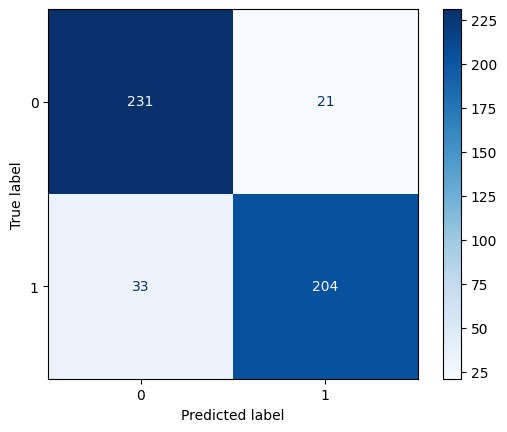

In [125]:
accuracy_20 = accuracy_score(valid_emoticon_Y, y_pred_valid_20)
conf_matrix = confusion_matrix(valid_emoticon_Y, y_pred_valid_20)

print(f"Accuracy: {accuracy_20*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## Accuracy Variation plot for different % of data

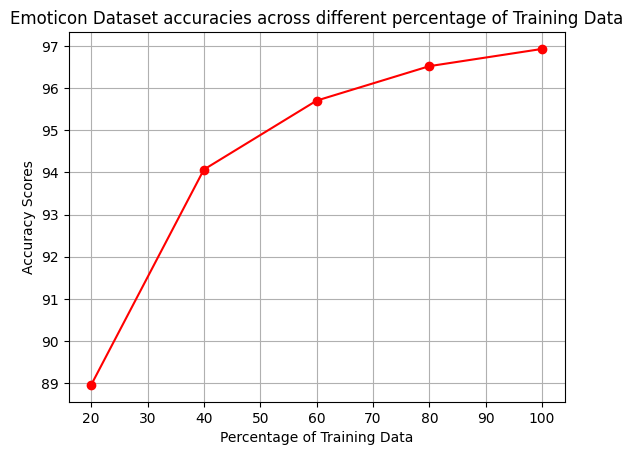

In [126]:
accuracy_scores = [accuracy_20*100, accuracy_40*100, accuracy_60*100, accuracy_80*100, accuracy_100*100]
percentage_of_data = [20, 40, 60, 80, 100]

plt.plot(percentage_of_data, accuracy_scores, color='red', marker='o')

plt.title('Emoticon Dataset accuracies across different percentage of Training Data')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy Scores')

# plt.ylim([91, 98])

plt.grid(True)
plt.show()

## Prediction For Test dataset

In [127]:
test_emoticon_df=pd.read_csv("datasets/test/test_emoticon.csv")
test_emoticon_X = test_emoticon_df['input_emoticon']

test_emoticon_X_data = [list(input_str) for input_str in test_emoticon_X]
test_emoticon_X_data = pd.DataFrame(test_emoticon_X_data)
test_emoticon_X_data = test_emoticon_X_data.map(ord)
test_emoticon_X_data = test_emoticon_X_data.astype(str)
test_emoticon_X_data = test_emoticon_X_data.apply(lambda row: ' '.join(row.values), axis=1)
test_emoticon_X_data = pd.DataFrame(test_emoticon_X_data, columns=['text'])

In [128]:
test_df = test_emoticon_X_data
test_df['tokens'] = test_df['text'].apply(lambda x: x.split())
def tokenize_test_data(df, vocab_dict_100):
    return df['tokens'].apply(lambda x: [vocab_dict_100[token] if token in vocab_dict_100 else 0 for token in x])
test_df['tokenized_text'] = tokenize_test_data(test_df, vocab_dict_100)
test_padded = pad_sequences(test_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
test_embeddings = embedding_model_100.predict(test_padded)
print("Test Embeddings Shape:", test_embeddings.shape)
test_emoticon_X_flattened = test_embeddings.reshape(test_embeddings.shape[0], -1)
test_emoticon_X_encoded=pd.DataFrame(test_emoticon_X_flattened)
test_emoticon_X_encoded = scaler_100.transform(test_emoticon_X_encoded)
y_pred_test = model_100.predict(test_emoticon_X_encoded)
np.savetxt("pred_emoticon.txt", y_pred_test, fmt="%d", delimiter="\n")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
Test Embeddings Shape: (2232, 13, 16)
